In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
from astropy import units as u
from astropy.time import Time
from datetime import datetime
from astropy import visualization as aviz
from astropy.coordinates import SkyCoord
from astroquery.imcce import Skybot
import os
import sys

In [4]:
# The INT WFC has a field of view: 34 x 34 arcmin
# https://www.ing.iac.es/engineering/detectors/ultra_wfc.htm
sep_cut = 17.0/60.0 # deg

In [5]:
sep_cut * 60 * 60

1020.0

In [6]:
# load the night log pointing information
df_obj = pd.read_csv("df_INT_obs.csv",index_col=0)

In [7]:
# exclude very long exposures (the moving objects will probably be trailed)
df_obj = df_obj[df_obj["Texp sec"]<180]

In [8]:
df_obj

,Run,Object,RA,Dec,Equinox,UT,Airm,Instr,Texp sec,Sky PA,...,Slit,Grat,CenwA,Comments,night,date,mjd,RA_deg,Dec_deg,search_group
0,1601822,NEREUS,15:05:18.19,-22:00:02.0,2000.0,04:11,1.72,3 WFC,60.00,180.0,...,NaN,NaN,NaN,mirror closed,20220302,20220303,59641.174306,226.325792,-22.000556,0.0
1,1601823,NEREUS,15:05:18.15,-22:00:02.3,2000.0,04:14,1.71,3 WFC,59.60,180.0,...,NaN,NaN,NaN,NaN,20220302,20220303,59641.176389,226.325625,-22.000639,0.0
2,1601824,NEREUS,15:05:18.10,-22:00:02.6,2000.0,04:16,1.70,4 WFC,60.10,180.0,...,NaN,NaN,NaN,NaN,20220302,20220303,59641.177778,226.325417,-22.000722,0.0
3,1601825,NEREUS,15:05:18.06,-22:00:03.0,2000.0,04:19,1.69,6 WFC,59.50,180.0,...,NaN,NaN,NaN,looking for asteriod,20220302,20220303,59641.179861,226.325250,-22.000833,0.0
4,1601826,NEREUS,15:05:18.02,-22:00:03.3,2000.0,04:22,1.68,7 WFC,60.10,180.0,...,NaN,NaN,NaN,NaN,20220302,20220303,59641.181944,226.325083,-22.000917,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,1661478,NAKANOTADAO,13:39:10.60,-04:10:44.6,2000.0,06:08,1.74,WFC,60.02,180.0,...,NaN,NaN,NaN,NaN,20230318,20230319,60022.255556,204.794167,-4.179056,150.0
4445,1661479,NAKANOTADAO,13:39:10.55,-04:10:44.2,2000.0,06:09,1.75,WFC,60.02,180.0,...,NaN,NaN,NaN,NaN,20230318,20230319,60022.256250,204.793958,-4.178944,150.0
4446,1661480,NAKANOTADAO,13:39:10.51,-04:10:43.5,2000.0,06:11,1.77,WFC,60.05,180.0,...,NaN,NaN,NaN,NaN,20230318,20230319,60022.257639,204.793792,-4.178750,150.0
4447,1661481,NAKANOTADAO,13:39:10.46,-04:10:43.0,2000.0,06:13,1.78,WFC,60.15,180.0,...,NaN,NaN,NaN,NaN,20230318,20230319,60022.259028,204.793583,-4.178611,150.0


In [9]:
df_obj.value_counts("Object")

Object
169P           649
172P           402
388188         341
162P           288
DIDYMOS        198
7P             193
NAKANOTADAO    186
1998SV65       185
1997WB22       159
2000RD101      145
FUCHIE         141
10P            141
143P           118
137P           114
90403          110
150P            95
85275           78
98943           68
121P            67
7891            41
29P             32
1998BU14        29
88992           25
26P             22
NEREUS          20
15P              7
81P              6
67P              2
189P             2
C2017K2          1
Name: count, dtype: int64

night
20220307    102
20220306     82
20220308     82
20220309     75
Name: count, dtype: int64


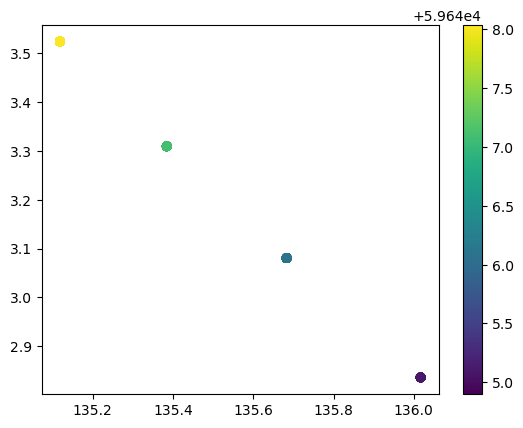

In [10]:
# plot all pointings for a particular object
x_plot = "RA_deg"
y_plot = "Dec_deg"
c_plot = "mjd"
df_plot = df_obj[(df_obj["Object"]=='388188')]

print(df_plot.value_counts("night"))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1 = ax1.scatter(df_plot[x_plot],df_plot[y_plot],c=df_plot[c_plot])
cbar1 = plt.colorbar(s1)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.show()

In [11]:
df_plot

,Run,Object,RA,Dec,Equinox,UT,Airm,Instr,Texp sec,Sky PA,...,Slit,Grat,CenwA,Comments,night,date,mjd,RA_deg,Dec_deg,search_group
421,1602395,388188,9:04:04.02,+02:50:08.2,2000.0,21:31,1.24,0 WFC,60.0,180.0,...,NaN,NaN,NaN,NaN,20220306,20220306,59644.896528,136.016750,2.835611,25.0
422,1602396,388188,9:04:04.02,+02:50:08.2,2000.0,21:33,1.23,5 WFC,60.0,180.0,...,NaN,NaN,NaN,NaN,20220306,20220306,59644.897917,136.016750,2.835611,25.0
423,1602397,388188,9:04:04.02,+02:50:08.2,2000.0,21:35,1.23,1 WFC,59.5,180.0,...,NaN,NaN,NaN,NaN,20220306,20220306,59644.899306,136.016750,2.835611,25.0
424,1602398,388188,9:04:04.02,+02:50:08.3,2000.0,21:36,1.22,6 WFC,60.1,180.0,...,NaN,NaN,NaN,NaN,20220306,20220306,59644.900000,136.016750,2.835639,25.0
425,1602399,388188,9:04:04.02,+02:50:08.3,2000.0,21:38,1.22,2 WFC,60.0,180.0,...,NaN,NaN,NaN,NaN,20220306,20220306,59644.901389,136.016750,2.835639,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1603160,388188,9:00:28.44,+03:31:27.9,2000.0,00:51,1.24,1 WFC,60.1,180.0,...,NaN,NaN,NaN,NaN,20220309,20220310,59648.035417,135.118500,3.524417,73.0
1074,1603161,388188,9:00:28.43,+03:31:27.9,2000.0,00:53,1.24,5 WFC,60.1,180.0,...,NaN,NaN,NaN,NaN,20220309,20220310,59648.036806,135.118458,3.524417,73.0
1075,1603162,388188,9:00:28.44,+03:31:27.9,2000.0,00:54,1.24,9 WFC,60.1,180.0,...,NaN,NaN,NaN,NaN,20220309,20220310,59648.037500,135.118500,3.524417,73.0
1076,1603163,388188,9:00:28.44,+03:31:27.9,2000.0,00:56,1.25,3 WFC,60.0,180.0,...,NaN,NaN,NaN,NaN,20220309,20220310,59648.038889,135.118500,3.524417,73.0


night
20220307    102
20220306     82
20220308     82
20220309     75
Name: count, dtype: int64


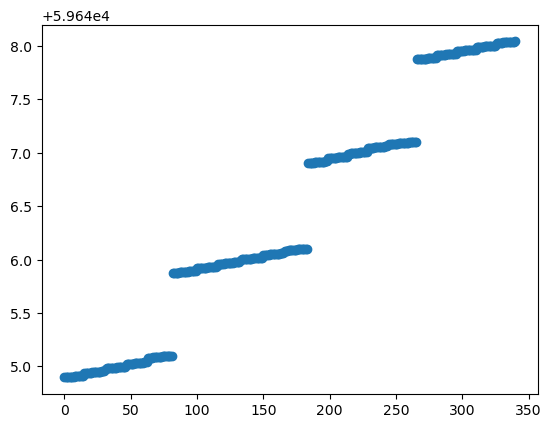

In [12]:
# plot how mjd changes for each observation
# This shows the different observing nights
y_plot = "mjd"
df_plot = df_obj[df_obj["Object"]=='388188']

print(df_plot.value_counts("night"))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.scatter(np.arange(len(df_plot)),df_plot[y_plot])

plt.show()

In [13]:
# query skybot for groups of pointings that are close together in ra, dec, and mjd
error_list = []
df_sky = pd.DataFrame()

for i in np.unique(df_obj["search_group"]):
    
    # load df if available
    fname = "skybot_results2/search_group_{}.csv".format(int(i))
    
    if os.path.isfile(fname):
        print("load {}".format(fname))
        df = pd.read_csv(fname,index_col=0)
    
    else:
        print("query skybot for search group {}".format(int(i)))
        _df = df_obj[df_obj['search_group']==i]

        ra_med = np.median(_df["RA_deg"])
        dec_med = np.median(_df["Dec_deg"])
        mjd_med = np.median(_df["mjd"])

        print(i,ra_med,dec_med,mjd_med)

        field = SkyCoord(ra_med*u.deg, dec_med*u.deg)
        epoch = Time(mjd_med, format='mjd')
        try:
            # sometimes skybot returns EOFerror, clear the cache
            # similar to https://github.com/astropy/astroquery/issues/1812
            results = Skybot.cone_search(field, sep_cut*u.deg, epoch, cache=False)
        except:
            print("error")
            error_list.append(i)
            continue

        df = results.to_pandas()

        # save dataframe
        df.to_csv(fname)
        
    # gather all search results into one dataframe
    df["search_group"] = int(i)
    df_sky = pd.concat([df_sky,df]).reset_index(drop=True)

#     break

load skybot_results2/search_group_0.csv
load skybot_results2/search_group_1.csv
load skybot_results2/search_group_2.csv
load skybot_results2/search_group_6.csv
load skybot_results2/search_group_7.csv
load skybot_results2/search_group_11.csv
load skybot_results2/search_group_13.csv
load skybot_results2/search_group_14.csv
load skybot_results2/search_group_21.csv
load skybot_results2/search_group_23.csv
load skybot_results2/search_group_24.csv
load skybot_results2/search_group_25.csv
load skybot_results2/search_group_27.csv
load skybot_results2/search_group_29.csv
load skybot_results2/search_group_31.csv
load skybot_results2/search_group_33.csv
load skybot_results2/search_group_35.csv
load skybot_results2/search_group_37.csv
load skybot_results2/search_group_39.csv
load skybot_results2/search_group_41.csv
load skybot_results2/search_group_43.csv
load skybot_results2/search_group_45.csv
load skybot_results2/search_group_47.csv
load skybot_results2/search_group_48.csv
load skybot_results2/

In [14]:
error_list

[]

In [15]:
df_sky

,Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,...,alpha,elong,x,y,z,vx,vy,vz,epoch,search_group
0,8703.0,Nakanotadao,204.798052,-4.180313,MB>Inner,17.8,0.009,5.197,-20.8493,17.480,...,11.68,152.96,-2.179531,-0.483486,-0.070808,0.002343,-0.010842,-0.003841,2460020.0,150
1,NaN,2015 PA96,204.762143,-4.228279,MB>Middle,22.2,0.038,210.302,-21.1891,13.445,...,8.63,152.99,-2.894620,-0.818439,-0.132005,0.002590,-0.008555,-0.003128,2460020.0,150
2,327584.0,2006 DX139,204.783797,-4.105015,MB>Outer,20.8,0.049,279.477,-20.8580,8.511,...,8.57,152.99,-2.912070,-0.827280,-0.125642,0.002129,-0.008799,-0.004362,2460020.0,150
3,404361.0,2013 GP20,204.737475,-4.262069,MB>Inner,21.4,0.062,360.763,-24.3566,18.368,...,11.45,153.01,-2.215794,-0.500626,-0.076297,0.001315,-0.010606,-0.003670,2460020.0,150
4,588950.0,2008 YS24,204.837095,-4.048757,MB>Middle,22.2,0.095,498.830,-22.7750,14.912,...,8.09,152.95,-3.086700,-0.913200,-0.142509,0.003887,-0.006913,-0.002295,2460020.0,150
5,179788.0,2002 TM8,204.855600,-4.028569,MB>Inner,21.0,0.063,589.079,-22.9838,13.067,...,10.40,152.93,-2.436687,-0.607281,-0.086749,0.004212,-0.008803,-0.003922,2460020.0,150
6,234292.0,Wolfganghansch,204.914560,-4.066948,MB>Middle,21.0,0.055,589.558,-24.2553,11.176,...,8.93,152.87,-2.812373,-0.787907,-0.118025,0.001681,-0.008403,-0.003865,2460020.0,150
7,NaN,2014 QM469,204.753498,-4.023488,MB>Outer,22.3,0.335,590.053,-18.3207,18.074,...,8.07,153.03,-3.085649,-0.905404,-0.143476,0.003929,-0.008225,-0.001494,2460020.0,150
8,133225.0,2003 QS88,204.637748,-4.121767,MB>Outer,19.5,0.017,611.585,-24.2184,2.718,...,7.75,153.13,-3.192985,-0.955240,-0.144895,0.002481,-0.006799,-0.005608,2460020.0,150
9,454033.0,2012 FH26,204.803065,-4.367991,MB>Outer,21.2,0.058,671.748,-18.4711,20.743,...,8.35,152.92,-2.989485,-0.862655,-0.150722,0.001576,-0.009490,-0.001169,2460020.0,150


In [16]:

for i in np.unique(df_obj["search_group"]):

    _df = df_obj[df_obj['search_group']==i]

    ra_med = np.median(_df["RA_deg"])
    dec_med = np.median(_df["Dec_deg"])
    mjd_med = np.median(_df["mjd"])

    print(i,ra_med,dec_med,mjd_med,np.unique(_df["night"]))

0.0 226.32447916666666 -22.001180555555553 59641.18784722222 [20220302]
1.0 271.0060208333333 -3.3830138888888888 59641.23611111112 [20220302]
2.0 63.258958333333325 29.585944444444443 59641.87361111112 [20220303]
6.0 187.55279166666665 22.27694444444444 59642.245486111104 [20220303]
7.0 63.375 29.587652777777777 59642.91458333334 [20220304]
11.0 173.5215833333333 -2.5604444444444443 59643.10277777778 [20220304]
13.0 187.32704166666664 22.348916666666664 59643.21944444445 [20220304]
14.0 63.48895833333332 29.589888888888886 59643.881944444445 [20220305]
21.0 187.0923333333333 22.420972222222225 59644.179861111115 [20220305]
23.0 187.0923333333333 22.420972222222225 59644.25208333333 [20220305]
24.0 63.60364583333333 29.592666666666663 59644.88194444445 [20220306]
25.0 136.01674999999997 2.835611111111111 59644.90555555555 [20220306]
27.0 136.01674999999997 2.835638888888889 59644.94583333333 [20220306]
29.0 136.01674999999997 2.8356250000000003 59644.98888888889 [20220306]
31.0 136.016

In [17]:
df_sky.value_counts("epoch")

epoch
2459640.0    478
2460010.0    390
2460020.0    377
2459910.0    298
2459900.0    221
Name: count, dtype: int64

In [18]:
# "main_targets" are the primary targets that were observed by INT in this observing runs

# main_targets = ['169P' '172P' '388188' '162P' '7P' '143P' 'DIDYMOS' '1998SV65'
#  'NAKANOTADAO' '2000RD101' '10P' 'FUCHIE' '1999WB22' '15P' '137P' '90403'
#  '150P' '85275' '98943' '121P' '88992' 'C2017K2' '29P' '7891' '26P'
#  '1998BU14' '189P' '1997WB22' '73P' 'NAKANOTADO' 'NEREUS' '67P' 'ROBINSON'
#  '300P' 'C2020K1' '9P' '108P' '81P' '22P' 'C2020E3' '15P2' 'C2021Y1']
main_targets = ['1997 WB22','1998 BU14','1998 SV65','2006 DP14',
                'Didymos','Fuchie','Nakanotadao', 'Nereus',
               'Davidhaack']

In [19]:
# display all skybot results that meet certain criteria
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    df_qry = df_sky[(df_sky["Type"]!="Comet") & 
                    (df_sky["V"]<20) & 
                   (~np.isin(df_sky["Name"],main_targets))].sort_values("V")
    display(df_qry)
    

,Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,geodist,heliodist,alpha,elong,x,y,z,vx,vy,vz,epoch,search_group
358,2354.0,Lavrov,219.571704,-13.193584,MB>Middle,17.2,0.030,801.460,-2.6015,4.376,2.291912,3.001859,15.37,126.91,-2.725307,-1.175972,-0.420496,0.004235,-0.007911,-0.002925,2459640.0,61
262,2354.0,Lavrov,219.587112,-13.223051,MB>Middle,17.2,0.030,794.722,-1.7049,4.075,2.304380,3.002249,15.58,125.84,-2.725307,-1.175972,-0.420496,0.004235,-0.007911,-0.002925,2459640.0,48
1643,6653.0,Feininger,184.098741,-0.187233,MB>Outer,17.3,0.008,904.662,-29.4317,11.617,2.050269,3.049274,2.30,172.96,-3.037996,-0.083674,0.021051,-0.000460,-0.008733,-0.004085,2460020.0,145
1450,6653.0,Feininger,184.286304,-0.261344,MB>Outer,17.3,0.008,489.190,-29.2364,11.565,2.051658,3.048632,2.67,171.82,-3.037996,-0.083674,0.021051,-0.000460,-0.008733,-0.004085,2460020.0,139
987,7596.0,Yumi,112.201026,34.710873,MB>Outer,17.4,0.017,227.684,-14.3502,12.626,2.434815,3.241428,11.64,138.49,-0.355052,2.702026,1.749610,-0.009094,-0.001183,0.000522,2459910.0,122
869,7596.0,Yumi,112.321685,34.620876,MB>Outer,17.4,0.017,289.173,-13.4899,12.618,2.444227,3.241108,11.90,137.38,-0.355052,2.702026,1.749610,-0.009094,-0.001183,0.000522,2459910.0,116
922,7596.0,Yumi,112.216643,34.699534,MB>Outer,17.4,0.017,255.628,-14.2424,12.626,2.435988,3.241388,11.67,138.35,-0.355052,2.702026,1.749610,-0.009094,-0.001183,0.000522,2459910.0,120
738,7596.0,Yumi,112.433801,34.531735,MB>Outer,17.4,0.017,371.522,-12.6279,12.599,2.453794,3.240789,12.15,136.27,-0.355052,2.702026,1.749610,-0.009094,-0.001183,0.000522,2459910.0,111
1338,6653.0,Feininger,184.490114,-0.342055,MB>Outer,17.5,0.007,224.714,-28.9893,11.493,2.053488,3.047927,3.07,170.57,-3.031796,0.003681,0.061884,-0.000781,-0.008737,-0.004081,2460010.0,135
1059,6653.0,Feininger,184.879995,-0.496963,MB>Outer,17.5,0.007,980.610,-28.4149,11.315,2.057947,3.046556,3.85,168.15,-3.031796,0.003681,0.061884,-0.000781,-0.008737,-0.004081,2460010.0,125


In [20]:
np.unique(df_qry['Number'])

array([  2354.,   4414.,   5767.,   6653.,   7596.,   8530.,   8607.,
        10863.,  16404.,  16419.,  19376.,  21425.,  22727.,  23240.,
        28033.,  31444.,  31560.,  31868.,  33739.,  34772.,  37229.,
        43382.,  43423.,  43809.,  45438.,  47651.,  49177.,  49994.,
        51561.,  54459.,  54505.,  55313.,  56478.,  56653.,  59259.,
        59291.,  60285.,  63245.,  64424.,  69915.,  69950.,  73970.,
        75578.,  78959.,  79292.,  88005.,  88954.,  90403.,  90888.,
        93176.,  93328.,  94340.,  97062.,  97161.,  97176.,  97724.,
        98943., 105519., 111252., 119019., 122613., 122776., 123519.,
       127999., 133225., 140576., 198614., 213903., 236881., 242803.,
       275420., 298947., 307119., 308296., 367508., 395672.])

In [21]:
df_qry.value_counts("Name")

Name
1999 VV210    11
2005 JA103     6
2000 SP79      5
2003 SL232     5
2000 OK55      5
              ..
2000 WG118     1
2000 XM3       1
2000 XQ41      1
2001 AJ35      1
2000 WJ146     1
Name: count, Length: 76, dtype: int64

In [22]:
for i in np.unique(df_sky["search_group"]):
    _df = df_sky[df_sky['search_group']==i]
    
    print(_df.iloc[0][["Name","V","centerdist"]])


Name          Nereus
V               17.9
centerdist    49.033
Name: 0, dtype: object
Name          2001 CC21
V                  18.7
centerdist       48.363
Name: 31, dtype: object
Name            172P
V               22.3
centerdist    10.099
Name: 35, dtype: object
Name            162P
V               21.2
centerdist    23.426
Name: 57, dtype: object
Name           172P
V              22.3
centerdist    8.066
Name: 64, dtype: object
Name            137P
V               24.6
centerdist    13.051
Name: 86, dtype: object
Name           162P
V              21.2
centerdist    8.273
Name: 104, dtype: object
Name           172P
V              22.3
centerdist    3.464
Name: 107, dtype: object
Name            162P
V               21.2
centerdist    40.797
Name: 124, dtype: object
Name            162P
V               21.2
centerdist    17.644
Name: 128, dtype: object
Name          172P
V             22.3
centerdist    3.98
Name: 132, dtype: object
Name          2006 DP14
V                  18

In [23]:
# look at the INT obs log information for visits that match a target of interest

# name = "1999 AC8"
# name = "Korbokkur"
# name = "2000 NX24"
# name = "1990 SF8"
name = "1999 VV210"

sg = np.array(df_sky[df_sky["Name"]==name]["search_group"])
df_targ = df_obj[np.isin(df_obj["search_group"],sg)]


In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_targ)

,Run,Object,RA,Dec,Equinox,UT,Airm,Instr,Texp sec,Sky PA,Filters etc.,Slit,Grat,CenwA,Comments,night,date,mjd,RA_deg,Dec_deg,search_group
626,1602616,388188,9:02:43.97,+03:04:49.4,2000.0,20:57,1.32,7 WFC,60.1,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.872917,135.683208,3.080389,37.0
627,1602617,388188,9:02:43.97,+03:04:49.3,2000.0,20:59,1.32,0 WFC,60.1,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.874306,135.683208,3.080361,37.0
628,1602618,388188,9:02:43.97,+03:04:49.3,2000.0,21:01,1.31,4 WFC,60.1,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.875694,135.683208,3.080361,37.0
629,1602619,388188,9:02:43.96,+03:04:49.3,2000.0,21:03,1.30,8 WFC,60.0,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.877083,135.683167,3.080361,37.0
630,1602620,388188,9:02:43.97,+03:04:49.3,2000.0,21:04,1.30,2 WFC,60.0,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.877778,135.683208,3.080361,37.0
631,1602621,388188,9:02:43.97,+03:04:49.4,2000.0,21:06,1.29,6 WFC,60.1,180.0,r,NaN,NaN,NaN,"some dark lines appearing, readout error?",20220307,20220307,59645.879167,135.683208,3.080389,37.0
632,1602622,388188,9:02:43.97,+03:04:49.4,2000.0,21:08,1.29,0 WFC,60.1,180.0,r,NaN,NaN,NaN,unusual background pattern. readout error?,20220307,20220307,59645.880556,135.683208,3.080389,37.0
633,1602623,388188,9:02:43.97,+03:04:49.3,2000.0,21:10,1.28,4 WFC,60.0,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.881944,135.683208,3.080361,37.0
634,1602624,388188,9:02:43.97,+03:04:49.3,2000.0,21:11,1.27,8 WFC,60.0,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.882639,135.683208,3.080361,37.0
635,1602625,388188,9:02:43.96,+03:04:49.3,2000.0,21:13,1.27,3 WFC,60.1,180.0,r,NaN,NaN,NaN,NaN,20220307,20220307,59645.884028,135.683167,3.080361,37.0


In [25]:
df_sky.columns

Index(['Number', 'Name', 'RA', 'DEC', 'Type', 'V', 'posunc', 'centerdist',
       'RA_rate', 'DEC_rate', 'geodist', 'heliodist', 'alpha', 'elong', 'x',
       'y', 'z', 'vx', 'vy', 'vz', 'epoch', 'search_group'],
      dtype='object')

In [26]:
df_obj.columns

Index(['Run', 'Object', 'RA', 'Dec', 'Equinox', 'UT', 'Airm', 'Instr',
       'Texp sec', 'Sky PA', 'Filters etc.', 'Slit', 'Grat', 'CenwA',
       'Comments', 'night', 'date', 'mjd', 'RA_deg', 'Dec_deg',
       'search_group'],
      dtype='object')

In [27]:
df_sky[df_sky["Name"]=="137P"]

,Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,...,alpha,elong,x,y,z,vx,vy,vz,epoch,search_group
86,NaN,137P,173.518481,-2.558564,Comet,24.6,0.3,13.051,-17.7146,7.539,...,1.79,168.07,-6.474248,0.89028,-0.135208,-0.002551,-0.003973,-0.001671,2459640.0,11
456,NaN,137P,172.803542,-2.249153,Comet,24.6,0.3,37.761,-17.9539,7.911,...,0.97,173.60,-6.474248,0.89028,-0.135208,-0.002551,-0.003973,-0.001671,2459640.0,80


In [28]:
# name_list = ["15P","1999 AC8"]
# name_list = ["Nakanotadao","Korbokkur"]
# name_list = ["137P", "2000 NX24"]
name_list = ["2006 DP14","1999 VV210"]

# df_sky_qry = df_sky[(np.isin(df_sky["Name"],name_list)) & 
#                    (df_sky["V"]<20)]
df_sky_qry = df_sky[(np.isin(df_sky["Name"],name_list))]
df_sky_qry

,Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,...,alpha,elong,x,y,z,vx,vy,vz,epoch,search_group
145,388188.0,2006 DP14,136.034733,2.824912,NEA>Apollo,18.3,0.109,75.264,-52.9986,38.050,...,21.74,148.89,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,25
153,388188.0,2006 DP14,136.020510,2.835118,NEA>Apollo,18.3,0.109,13.651,-52.7683,37.948,...,21.77,148.85,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,27
162,388188.0,2006 DP14,136.005375,2.845997,NEA>Apollo,18.3,0.109,55.381,-52.5229,37.840,...,21.79,148.79,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,29
170,388188.0,2006 DP14,135.990795,2.856496,NEA>Apollo,18.3,0.109,119.780,-52.2863,37.735,...,21.82,148.74,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,31
179,388188.0,2006 DP14,135.969769,2.871667,NEA>Apollo,18.3,0.109,212.971,-51.9447,37.583,...,21.86,148.67,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,33
194,388188.0,2006 DP14,135.706466,3.065117,NEA>Apollo,18.3,0.109,100.036,-47.6194,35.665,...,22.34,147.71,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,37
195,97176.0,1999 VV210,135.683415,3.218353,MB>Outer,19.2,0.026,496.723,-20.0018,10.239,...,10.37,147.70,-2.406064,1.692199,0.229473,-0.005265,-0.007706,-0.003883,2459640.0,37
201,388188.0,2006 DP14,135.693024,3.075177,NEA>Apollo,18.3,0.109,39.965,-47.3960,35.566,...,22.37,147.66,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,39
202,97176.0,1999 VV210,135.677762,3.221245,MB>Outer,19.2,0.026,507.461,-19.9693,10.238,...,10.38,147.66,-2.406064,1.692199,0.229473,-0.005265,-0.007706,-0.003883,2459640.0,39
208,388188.0,2006 DP14,135.679865,3.085045,NEA>Apollo,18.3,0.109,20.627,-47.1770,35.469,...,22.39,147.61,-1.199845,0.536306,0.138253,-0.014499,-0.002374,-0.003891,2459640.0,41


In [29]:
df_sky_qry.columns

Index(['Number', 'Name', 'RA', 'DEC', 'Type', 'V', 'posunc', 'centerdist',
       'RA_rate', 'DEC_rate', 'geodist', 'heliodist', 'alpha', 'elong', 'x',
       'y', 'z', 'vx', 'vy', 'vz', 'epoch', 'search_group'],
      dtype='object')

In [30]:
df_targ.columns

Index(['Run', 'Object', 'RA', 'Dec', 'Equinox', 'UT', 'Airm', 'Instr',
       'Texp sec', 'Sky PA', 'Filters etc.', 'Slit', 'Grat', 'CenwA',
       'Comments', 'night', 'date', 'mjd', 'RA_deg', 'Dec_deg',
       'search_group'],
      dtype='object')

In [31]:
np.unique(df_targ['search_group'])

array([37., 39., 41., 43., 45., 47., 51., 53., 55., 57., 59.])

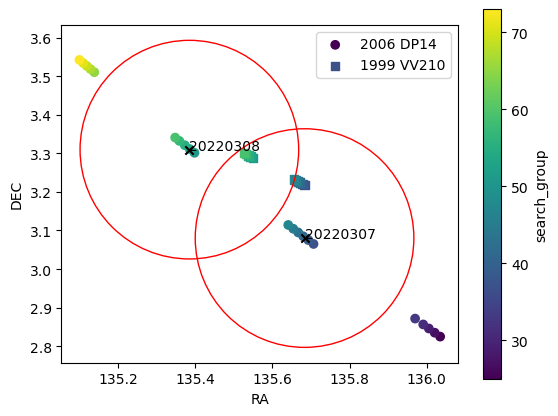

In [32]:
# plot the primary INT target and the secondary target found with skybot

x_plot = "RA"
y_plot = "DEC"
# c_plot = "V"
c_plot = "search_group"

df_plot = df_sky_qry

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

vmin = np.amin(df_plot[c_plot])
vmax = np.amax(df_plot[c_plot])
for x,m in zip(name_list,['o','s']):
    _df_plot = df_plot[df_plot["Name"]==x]
    s1 = ax1.scatter(_df_plot[x_plot],_df_plot[y_plot],c=_df_plot[c_plot],
                     vmin = vmin, vmax = vmax,
                     marker = m, label = x)
cbar1 = plt.colorbar(s1)
cbar1.set_label(c_plot)

# for i in np.unique(df_targ["search_group"]):
    
#     _df_plot = df_targ[df_targ['search_group']==i]
    
#     ra_med = np.median(_df_plot["RA_deg"])
#     dec_med = np.median(_df_plot["Dec_deg"])
    
#     ax1.scatter(ra_med,dec_med,marker = "x", c = "k")
#     circle1 = plt.Circle((ra_med,dec_med), sep_cut, edgecolor='r', facecolor = "none")
#     ax1.add_patch(circle1)
    
#     obj = np.unique(_df_plot['Object'])[0]
#     night = np.unique(_df_plot['night'])[0]
#     ax1.text(ra_med,dec_med,"{}, {}".format(obj,night))

for n in np.unique(df_targ["night"]):
    
    _df_plot = df_targ[df_targ['night']==n]
    
    ra_med = np.median(_df_plot["RA_deg"])
    dec_med = np.median(_df_plot["Dec_deg"])
    
    ax1.scatter(ra_med,dec_med,marker = "x", c = "k")
    circle1 = plt.Circle((ra_med,dec_med), sep_cut, edgecolor='r', facecolor = "none")
    ax1.add_patch(circle1)
    
    ax1.text(ra_med,dec_med,"{}".format(n))

ax1.legend()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

ax1.set_aspect("equal")

plt.show()

In [33]:
np.unique(_df_plot['Object'])

array(['388188'], dtype=object)

In [34]:
len(df_targ)

184

In [35]:
df_targ[["Texp sec","Airm","Filters etc."]]

,Texp sec,Airm,Filters etc.
626,60.1,1.32,r
627,60.1,1.32,r
628,60.1,1.31,r
629,60.0,1.30,r
630,60.0,1.30,r
...,...,...,...
912,60.1,1.64,r
913,60.2,1.65,r
914,60.0,1.67,r
915,60.0,1.68,r


In [36]:
df_targ["Texp sec"].sum()/60/60

3.0685555555555557